In [1]:
import numpy as np
import matplotlib.pyplot as plt
from env import mrp
from td import *
%matplotlib inline

In [2]:
env = mrp.machine_repair(True)
TD = TD_learner(env.nS, 0.9)

In [ ]:
class CVaROptimize():
    def __init__(self, nS, nA):
        self.lr = {lr1: 1e-3, lr2: 1e-3, lr3: 1e-3, lr4: 1e-3}
        self.policy = np.random.rand(nA, nS)
        self.value = np.random.rand(nS+1)
        self.lambda_max = 5
        self.lambda = 0.1
        self.nu = 0.1
        self.gamma = 0.9
        self.nS = nS
        self.nA = nA
    def featurize(self, x, s):
        size = self.nS + 1
        feature = np.zeros(size)
        feature[:self.nS] = x
        feature[-1] = s
        return feature
    def mapnu(self, nu):
        raise Exception("not implemented")
        
    def observe(self,x,s,a,nx,cost,k):
        ns = (s - cost)/self.gamma
        cost = cost # for now equal
        TDerror = cost + self.gamma * np.dot(self.value, self.featurize(nx,ns))-\
            np.dot(self.value, self.featurize(x,s))
        self.value += self.lr['lr4'] * TDError * self.featurize(x, s)
        
        self.nunew = self.mapnu(self.nu - self.lr['lr3']*(self.lambda +\
            np.dot(self.value, (self.featurize(0, self.nu + 0.001) - self.featurize(0, self.nu - 0.001))/0.002)))
        
        current_policy = self.softmax(np.dot(self.policy, self.featurize(x,s)))
        grad_log_policy = np.zeros(self.nS, self.nA)
        grad_log_policy[:, s] = -current_policy[a]
        grad_log_policy[a, s] = 1-current_policy[a]                              
                                
        self.policy -= (self.lr['lr2']/(1-self.gamma) * grad_log_policy * TDerror) #Not yet
        
        self.lambdanew = self.maplambda(self.lambda + self.lr['lr1'] *\
            (self.nu - self.beta)
        if terminal:
            self.lambdanew = self.maplambda(self.lambda + self.lr['lr1'] *\
            (self.nu - self.beta + self.lambda**k/(1-self.alpha)*np.positive(-s))
                                     
                             
                             

In [5]:
policy = np.zeros(50)+1
policy[49] = 0

In [7]:
s = env.reset()
n_iteration = 100000
var_sn = np.zeros(n_iteration)
val_sn = np.zeros(n_iteration)
for i in range(n_iteration):
    ns, r, _ = env.step(policy[s])
    TD.observe(s, r, ns)
    s = ns
    var_sn[i] = TD.variance[-1]
    val_sn[i] = TD.value[-1]

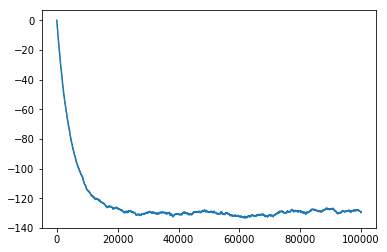

In [8]:
plt.plot(val_sn)

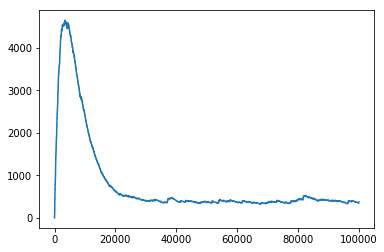

In [9]:
plt.plot(var_sn)